In [1]:
%matplotlib inline



import matplotlib.pyplot as plt
import pandas as pd
import qgrid
import seaborn as sns

from openfisca_france_indirect_taxation.build_survey_data.calibration_aliss import (
    compute_expenditures, compute_population_shares
    )    

qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folder
pd.set_option('precision', 3)

## Inspection des parts occupés par les différents groupes dans la population totale 

In [2]:
population = compute_population_shares(drop_dom = True)

/home/etalab/openfisca/openfisca-france-indirect-taxation/openfisca_france_indirect_taxation/build_survey_data/calibration_aliss.py:119: FutureWarning: eval expressions containing an assignment currentlydefault to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  input_data_frame.eval("age = 0 + (agepr > 30) + (agepr > 45) + (agepr > 60)",
/home/etalab/openfisca/openfisca-survey-manager/openfisca_survey_manager/statshelpers.py:122: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  ret[and_(data >= lower, data < upper)] = labels[i]


In [3]:
population

,age,revenus,aliss_population,aliss_population_share,bdf_population,bdf_population_share
0,0,0,16847.668,0.013,1.099e+06,0.040
1,0,1,38503.246,0.030,1.373e+06,0.049
2,0,2,34176.672,0.026,9.774e+05,0.035
3,0,3,11981.437,0.009,3.292e+05,0.012
4,1,0,66742.000,0.052,1.170e+06,0.042
5,1,1,165285.547,0.128,2.964e+06,0.107
6,1,2,103976.250,0.080,2.226e+06,0.080
7,1,3,57675.574,0.045,9.493e+05,0.034
8,2,0,51258.973,0.040,1.009e+06,0.036
9,2,1,114974.328,0.089,2.575e+06,0.093


## Récupération des cales (sans réforme)

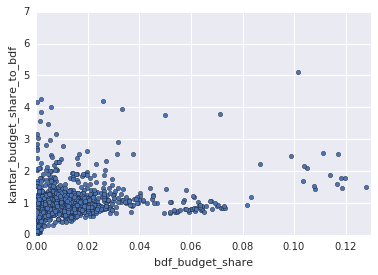

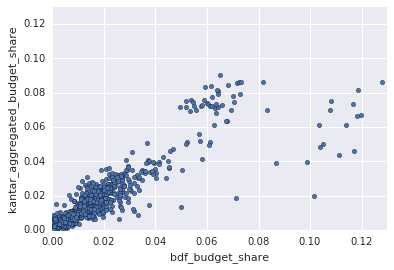

In [8]:
budget = compute_expenditures(drop_dom = True, display_plot = True)

### Les différents niveaux de l'indexation (age, revenus, produits) 

In [9]:
budget.index.levels[0], budget.index.levels[1], budget.index.levels[2]

(Int64Index([0, 1, 2, 3], dtype='int64', name=u'age'),
 Int64Index([0, 1, 2, 3], dtype='int64', name=u'revenus'),
 Index([u'11111 : Riz', u'11112 : Plat Riz sans viande',
        u'11113 : Plat Riz pr�par� avec de la viande',
        u'11121 : Pain et Panification s�che', u'11122 : Viennoiserie',
        u'11123 : P�tisseries fra�ches', u'11124 : P�tisserie surgel�e',
        u'11125 : P�tisseries de conservation',
        u'11126 : Biscuits secs sucr�s et g�teaux industriels',
        u'11127 : Biscuits Ap�ritifs',
        ...
        u'12211 : Eaux min�rales ou de source', u'12221 : Boissons gazeuses',
        u'12231 : Jus de Fruits ', u'12232 : Boissons aromatis�es ',
        u'12241 : Jus de l�gumes', u'21111 : Spiritueux et liqueurs',
        u'21211 : Vins et cidres/Poir�',
        u'21221 : Autres ap�ritifs, champagne et autres',
        u'21311 : Bi�re alcoolis�e', u'21312 : Bi�re non alcoolis�e'],
       dtype='object', name=u'nomk', length=108))

### Les valeurs budgétaires disponibles

In [10]:
budget.columns

Index([u'poste_coicop', u'bdf_budget_share', u'bdf_expenditures',
       u'kantar_aggregated_budget_share', u'kantar_aggregated_expenditures',
       u'kantar_budget_share', u'kantar_expenditures', u'nomc',
       u'kantar_to_bdf', u'kantar_budget_share_to_bdf'],
      dtype='object')

### Recherche de valeurs aberrantes

In [12]:
anomalies = budget.query('kantar_budget_share_to_bdf > 2')[  # Les parts budgétaires diffèrent d'un facteur supérieur à 3
        ['kantar_aggregated_budget_share', 'bdf_budget_share', 'kantar_budget_share_to_bdf']]
anomalies.sort_values('kantar_budget_share_to_bdf', ascending = False)  # par ordre de facteur décroissant

kantar_aggregated_budget_share  \
age revenus nomk                                                                                 
0   3       21211 : Vins et cidres/Poir�                                             1.987e-02   
1   3       11751 : L�gumes secs                                                     3.961e-04   
2   0       11231 : Viande ovine                                                     6.165e-03   
    1       11551 : Autres graisses  alimentaires animales                           5.698e-05   
0   1       11411 : lait entier                                                      1.357e-03   
    0       11941 : Plats sans information sur la composition                        8.407e-03   
1   0       11751 : L�gumes secs                                                     4.869e-04   
0   3       21221 : Autres ap�ritifs, champagne et autres                            1.881e-02   
            21111 : Spiritueux et liqueurs                                           1.337e-02   
    0       11751 : L�gumes secs                                                     3.935e-04   
            11231 : Viande ovine                                                     1.265e-03   
1   0       12121 : Th�s et infusions                                                2.363e-03   
            11551 : Autres graisses  alimentaires animales                           6.825e-05   
0   1       12241 : Jus de l�gumes                                                   1.505e-04   
1   0       11411 : lait entier                                                      1.777e-03   
0   0       21211 : Vins et cidres/Poir�                                             1.084e-02   
    2       12241 : Jus de l�gumes                                                   5.191e-05   
2   0       11411 : lait entier                                                      1.363e-03   
            11671 : Autres fruits, fruits tropicaux                                  3.680e-03   
1   0       12241 : Jus de l�gumes                                                   4.746e-05   
2   3       11551 : Autres graisses  alimentaires animales                           4.240e-05   
    0       11741 : L�gumes frais  cultiv�s pour leurs racines                       7.379e-03   
3   1       11123 : P�tisseries fra�ches                                             4.334e-02   
            11121 : Pain et Panification s�che                                       4.334e-02   
            11124 : P�tisserie surgel�e                                              4.334e-02   
            11127 : Biscuits Ap�ritifs                                               4.334e-02   
            11126 : Biscuits secs sucr�s et g�teaux industr...                       4.334e-02   
            11125 : P�tisseries de conservation                                      4.334e-02   
            11122 : Viennoiserie                                                     4.334e-02   
    0       11125 : P�tisseries de conservation                                      4.589e-02   
...                                                                                        ...   
1   0       11301 : Poissons frais ou r�frig�r�s                                     7.243e-03   
0   0       11671 : Autres fruits, fruits tropicaux                                  3.193e-03   
2   3       11121 : Pain et Panification s�che                                       4.813e-02   
            11125 : P�tisseries de conservation                                      4.813e-02   
            11122 : Viennoiserie                                                     4.813e-02   
            11123 : P�tisseries fra�ches                                             4.813e-02   
            11127 : Biscuits Ap�ritifs                                               4.813e-02   
            11126 : Biscuits secs sucr�s et g�teaux industr...                       4.813e-02   
            11124 : P�tisserie surgel�e       

In [6]:
anomalies = budget.query('kantar_budget_share_to_bdf > 3')[
        ['kantar_aggregated_budget_share', 'bdf_budget_share', 'kantar_budget_share_to_bdf']]
anomalies.sort_values('bdf_budget_share', ascending = False)  # par ordre de part budgétaire dans BDF

kantar_aggregated_budget_share  \
age revenus nomk                                                                                 
0   3       21211 : Vins et cidres/Poir�                                             1.987e-02   
            21221 : Autres ap�ritifs, champagne et autres                            1.881e-02   
            21111 : Spiritueux et liqueurs                                           1.337e-02   
    0       11941 : Plats sans information sur la composition                        8.407e-03   
2   0       11231 : Viande ovine                                                     6.165e-03   
1   0       12121 : Th�s et infusions                                                2.363e-03   
0   1       11411 : lait entier                                                      1.357e-03   
    0       11231 : Viande ovine                                                     1.265e-03   
1   0       11751 : L�gumes secs                                                     4.869e-04   
    3       11751 : L�gumes secs                                                     3.961e-04   
0   0       11751 : L�gumes secs                                                     3.935e-04   
    1       12241 : Jus de l�gumes                                                   1.505e-04   
2   1       11551 : Autres graisses  alimentaires animales                           5.698e-05   
1   0       11551 : Autres graisses  alimentaires animales                           6.825e-05   

                                                                bdf_budget_share  \
age revenus nomk                                                                   
0   3       21211 : Vins et cidres/Poir�                               1.014e-01   
            21221 : Autres ap�ritifs, champagne et autres              7.113e-02   
            21111 : Spiritueux et liqueurs                             5.007e-02   
    0       11941 : Plats sans information sur la composition          3.323e-02   
2   0       11231 : Viande ovine                                       2.595e-02   
1   0       12121 : Th�s et infusions                                  7.465e-03   
0   1       11411 : lait entier                                        5.448e-03   
    0       11231 : Viande ovine                                       4.389e-03   
1   0       11751 : L�gumes secs                                       1.871e-03   
    3       11751 : L�gumes secs                                       1.691e-03   
0   0       11751 : L�gumes secs                                       1.408e-03   
    1       12241 : Jus de l�gumes                                     4.590e-04   
2   1       11551 : Autres graisses  alimentaires animales             2.369e-04   
1   0       11551 : Autres graisses  alimentaires animales             2.150e-04   

                                                                kantar_budget_share_to_bdf  
age revenus nomk                                                                            
0   3       21211 : Vins et cidres/Poir�                                             5.102  
            21221 : Autres ap�ritifs, champagne et autres                            3.782  
            21111 : Spiritueux et liqueurs                                           3.746  
    0       11941 : Plats sans information sur la composition                        3.953  
2   0       11231 : Viande ovine                                                     4.209  
1   0       12121 : Th�s et infusions                                                3.159  
0   1       11411 : lait entier                                                      4.014  
    0       11231 : Viande ovine                                                     3.469  
1   0       11751 : L�gumes secs                                                     3.842  
    3       11751 : L�gumes secs                                                     4.270  
0   0       11751 : L�gumes secs  